## Empowering Retention: Predicting Customer Churn with Machine Learning Insights

## OVERVIEW

This project focuses on leveraging machine learning to predict customer churn, enabling businesses to proactively address potential customer attrition. By analyzing historical data, including demographics, transaction history, and engagement patterns, a predictive model was developed to identify customers at risk of leaving.

By employing data preprocessing, exploratory data analysis (EDA), and feature engineering techniques, the project ensures high-quality inputs for model training. Various algorithms, including logistic regression, random forests, and gradient boosting machines, are evaluated to achieve the best performance.

#### DATA DESCRIPTION

- Customer ID: A unique identifier for the customer
- Name: The name of the customer
- Age: The age of the customer
- Gender: The gender of the customer (Male, Female)
- Location: The location of the customer
- Email: The email address of the customer
- Phone: The phone number of the customer
- Address: The Postal address of the customer
- Segment: The customer segment/category to which the customer belongs

## ANALYTICAL QUESTIONS

- Which customer segments (Segment column) are most prone to churn, and why?

- Are there specific times of the year (based on Timestamp) when churn rates are higher, and why?

- How does the Net Promoter Score (NPS) correlate with churn?

- What is the churn probability for customers ?

- How does the sentiment or frequency of customer feedback correlate with churn?


## DATA UNDERSTANDING

In [78]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from ast import literal_eval
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, LabelEncoder, RobustScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, mutual_info_classif 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier, 
    GradientBoostingClassifier
)

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier



In [2]:
# Loading our dataset
Customer_df =pd.read_excel('../Dataset/Dataset.xlsx')

In [3]:
# retrieving the first 5 rows
Customer_df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


In [4]:
# columns for the dataset
Customer_df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp'],
      dtype='object')

In [5]:
# size of the dataframe
Customer_df.shape

(12483, 21)

In [6]:
# Information of the dataframe
Customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              12483 non-null  int64 
 1   Name                    12483 non-null  object
 2   Age                     12483 non-null  int64 
 3   Gender                  12483 non-null  object
 4   Location                12483 non-null  object
 5   Email                   12483 non-null  object
 6   Phone                   12483 non-null  object
 7   Address                 12483 non-null  object
 8   Segment                 12483 non-null  object
 9   PurchaseHistory         12483 non-null  object
 10  SubscriptionDetails     12483 non-null  object
 11  ServiceInteractions     12483 non-null  object
 12  PaymentHistory          12483 non-null  object
 13  WebsiteUsage            12483 non-null  object
 14  ClickstreamData         12483 non-null  object
 15  En

In [7]:
# Convert to datetime and format to year-month-day
Customer_df['Timestamp']= pd.to_datetime(Customer_df['Timestamp']).dt.strftime('%Y-%m-%d')


In [8]:
# Checking missing values
Customer_df.isna().sum()

CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64

In [9]:
# Checking for duplicates
Customer_df.duplicated().sum()

np.int64(0)

In [10]:
# Retrieving unique values for dataframe
for column in Customer_df:
        print(f"Column Name : {column}")
        print(Customer_df[column].unique())
        print("-----------------------------")

Column Name : CustomerID
[ 1001  1002  1003 ... 13481 13482 13483]
-----------------------------
Column Name : Name
['Mark Barrett' 'Jeremy Welch' 'Brandon Patel' ... 'Lisa Rodgers'
 'Kristin Carey' 'Melissa Carter']
-----------------------------
Column Name : Age
[31 66 36 62 68 65 52 48 67 18 60 54 45 29 57 43 23 30 63 70 41 19 21 34
 69 24 32 53 35 55 50 38 59 22 47 37 39 49 61 51 58 28 40 64 46 42 44 27
 20 33 26 25 56]
-----------------------------
Column Name : Gender
['Male' 'Female']
-----------------------------
Column Name : Location
['Andrewfort' 'Millerhaven' 'Lozanostad' ... 'New Lauren' 'Randymouth'
 'East Erin']
-----------------------------
Column Name : Email
['allison74@example.net' 'fmiller@example.com' 'jasonbrown@example.org'
 ... 'carrjennifer@example.org' 'josephcarter@example.net'
 'regina88@example.net']
-----------------------------
Column Name : Phone
['3192528777' '231-587-1818x8651' '(270)633-9095' ... '951-489-9554'
 '001-335-464-3236x722' '816-238-9247']


In [11]:
Customer_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,12483.0,NaN,NaN,NaN,7242.0,3603.67604,1001.0,4121.5,7242.0,10362.5,13483.0
Name,12483,11617,Michael Johnson,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,12483.0,NaN,NaN,NaN,43.930065,15.341521,18.0,31.0,44.0,57.0,70.0
Gender,12483,2,Male,6269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,12483,9255,Lake Michael,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Email,12483,12138,wsmith@example.net,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Phone,12483,12483,816-238-9247,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,12483,12483,USCGC Lopez\nFPO AE 85542,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,12483,3,Segment C,4199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PurchaseHistory,12483,12483,"[{'Product': 'Pool Brushes & Brooms', 'Frequen...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### KEY FINDINGS & OBSERVATIONS

- A total of 12,483 customers, with an average age of 43 years, spanning ages 18 to 70.

- A higher proportion of male customers compared to females.

- Lake Michael as the most common customer location, with 17 customers residing there.

- 4,199 customers belonging to Segment C, the largest customer category.

- Most customers engaged weekly, often logging in with a single login session.

- 42 customers utilized the credit card payment method with no late payments.


In [12]:
# List nested column
nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]

In [13]:
w1, w2 = 25,1000
for col in nested_columns:
    row = [col, Customer_df[col][0]]
    print('\n| {:<{w1}} | {:<{w2}} |' .format(*row, w1=w1, w2=w2))


| PurchaseHistory           | [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [14]:
# retrieving columns with numerical data types
num_cols=Customer_df.select_dtypes(include='number')
num_cols= num_cols.drop(columns= 'CustomerID')
num_cols.columns

Index(['Age', 'NPS', 'ChurnLabel'], dtype='object')

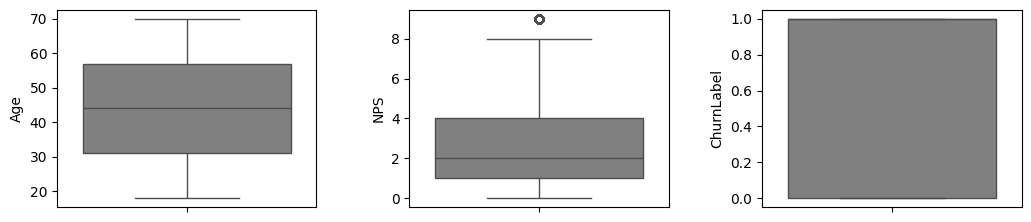

In [15]:

# plotting box plot for numerical data
plt.figure(figsize=(18, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(6,5, i + 1)
    sns.boxplot(Customer_df, y=Customer_df[variable], color='gray')
    plt.tight_layout(pad=3),
    plt.xticks(rotation=45)
plt.show()

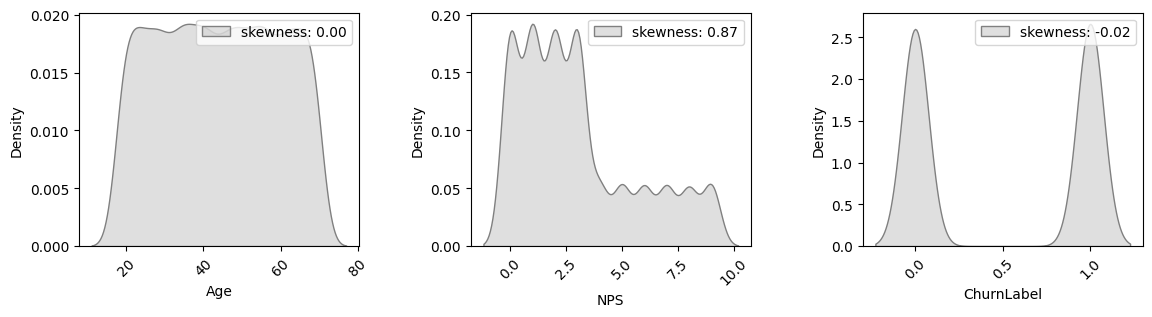

In [16]:
# Plot a Kernel density plot for the variables

plt.figure(figsize=(20, 20))

for i, variable in enumerate(num_cols):
    plt.subplot(6,5, i + 1)
    sns.kdeplot(Customer_df,x=Customer_df[variable],label= 'skewness: %.2f'%(Customer_df[variable].skew()), fill = True,color= 'gray')
    plt.tight_layout(pad=3)
    plt.legend(loc = 'upper right')
    plt.xticks(rotation=45)

In [17]:
# retrieving columns with numerical data types
Anal_cols=Customer_df[['Segment', 'Gender', 'Age']]
Anal_cols.columns

Index(['Segment', 'Gender', 'Age'], dtype='object')

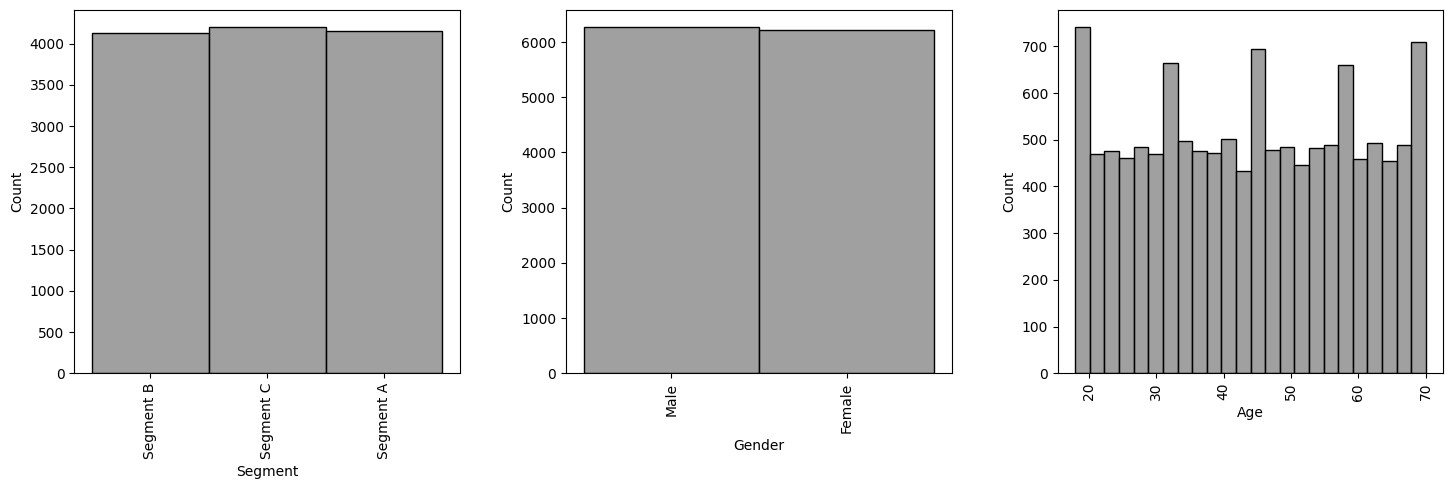

In [18]:
# Plot a histogram plot for the variables
plt.figure(figsize=(25, 30))

for i, variable in enumerate(Anal_cols):
    plt.subplot(6,5, i + 1)
    sns.histplot(Anal_cols,x=Anal_cols[variable], color= 'gray')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=90)

#### BIVARIATE ANALYSIS

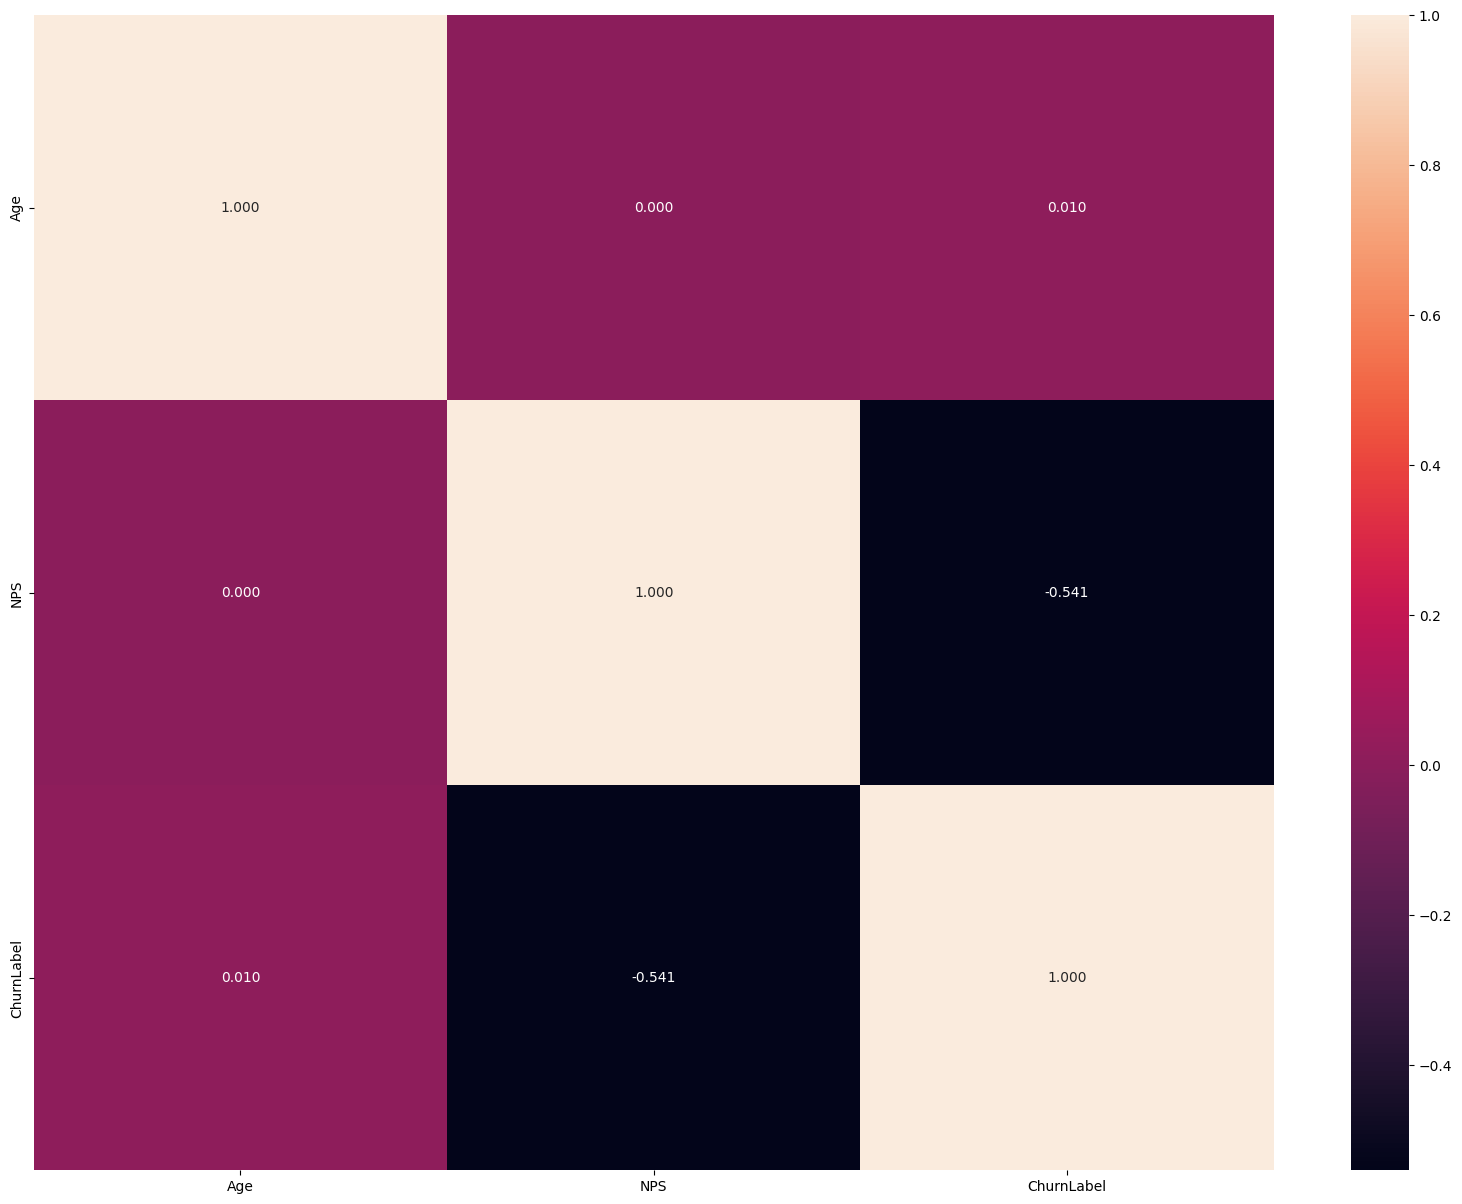

In [19]:
# plotting heatmap for correlatiuon between each variable
plt.figure(figsize=(20, 15))
sns.heatmap(data=num_cols.corr(), annot=True,color=['skyblue','brown'], fmt= '.3f')
plt.show()

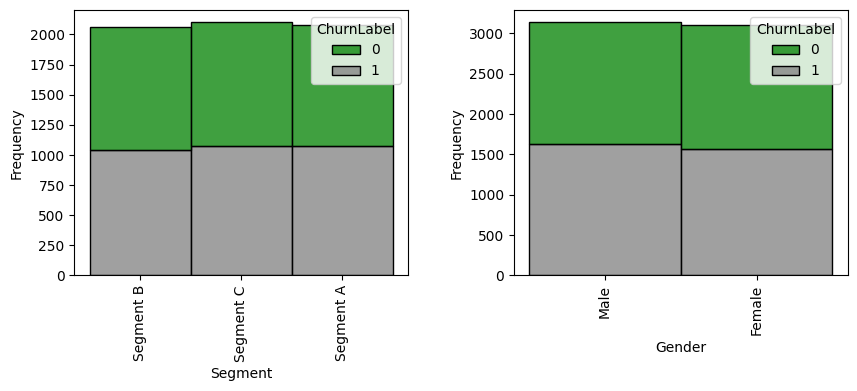

In [20]:
# Dropping the 'Age' column from Anal_cols
Anal_cols = [col for col in Anal_cols if col != 'Age']  # Ensure Anal_cols is a list and exclude 'Age'


plt.figure(figsize=(18, 20))
# Plotting histogram
for i, variable in enumerate(Anal_cols):
    plt.subplot(5, 4, i + 1)
    sns.histplot(Customer_df, x=Customer_df[variable], stat='frequency', hue='ChurnLabel', multiple='stack', palette=['green', 'gray'])
    plt.tight_layout(pad=3)
    plt.xticks(rotation=90)

plt.show()

## OBSERVATION

- Among the three customer segments analyzed, Segment C has the highest number of customers, making it the most significant segment in terms of size.

- Our analysis reveals that male customers are more prevalent than female customers within the dataset.

- The distribution of customer ages is uneven, indicating variability in the age demographics of our customer base.

- The age of customers is centered around a median of 43 years, with the youngest customers being just under 20 years old.

- The Net Promoter Score (NPS) of our customers displays a right-skewed distribution, with a skewness value calculated at 0.87.

- There is a noticeable negative correlation between the churn label rate and the NPS score, suggesting that customers with lower NPS are more likely to churn.

- A very weak positive correlation exists between age and the churn label, highlighting that age has minimal to no impact on whether a customer is likely to churn.

- The majority of customers who churned belong to Segment C, followed by Segment A, indicating that these segments may require targeted retention strategies.

- Among male customers, a significant portion of churn was observed, suggesting that male customers may exhibit higher churn tendencies compared to other demographics.

## ANALYTICAL QUESTIONS

- Which customer segments (Segment column) are most prone to churn, and why?


In [21]:
Customer_df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05


In [22]:
segment_group = Customer_df.groupby('Segment')['ChurnLabel'].value_counts().reset_index()
segment_group

,Segment,ChurnLabel,count
0,Segment A,1,2127
1,Segment A,0,2030
2,Segment B,1,2064
3,Segment B,0,2063
4,Segment C,1,2123
5,Segment C,0,2076


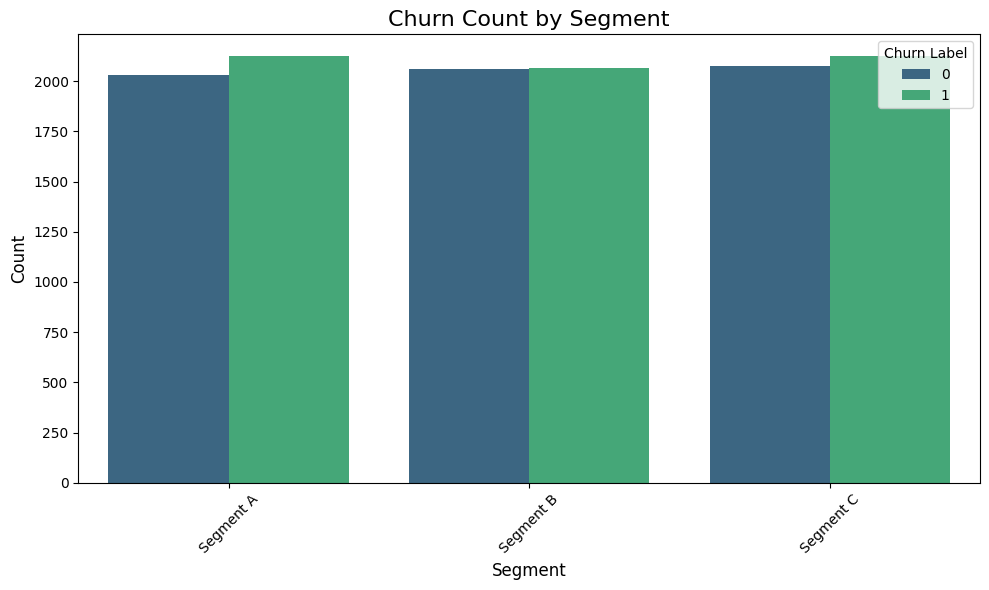

In [23]:
# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_group, x='Segment', y='count', hue='ChurnLabel', palette='viridis')

# Add labels and title
plt.title('Churn Count by Segment', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Churn Label', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


We discovered that Segment A is more prone to churn compared to Segment B. While Segment C is relatively close, with only a 4-customer difference, Segment A shows the highest disparity between customers who churn and those who do not, highlighting its elevated churn risk.

- Are there specific times of the year (based on Timestamp) when churn rates are higher, and why?

In [24]:
Churned_customers = Customer_df[Customer_df['ChurnLabel'] == 1 ]

In [25]:
# Ensure 'Timestamp' is in datetime format
Churned_customers['Timestamp'] = pd.to_datetime(Churned_customers['Timestamp'])


/var/folders/tk/fdypsrw94kg40x6m2x674k_m0000gn/T/ipykernel_61936/4095232671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Churned_customers['Timestamp'] = pd.to_datetime(Churned_customers['Timestamp'])


In [26]:
# Group by month and year, count churned customers
churn_counts = Churned_customers.groupby(Churned_customers['Timestamp'].dt.to_period('M')).size().reset_index(name='Count')

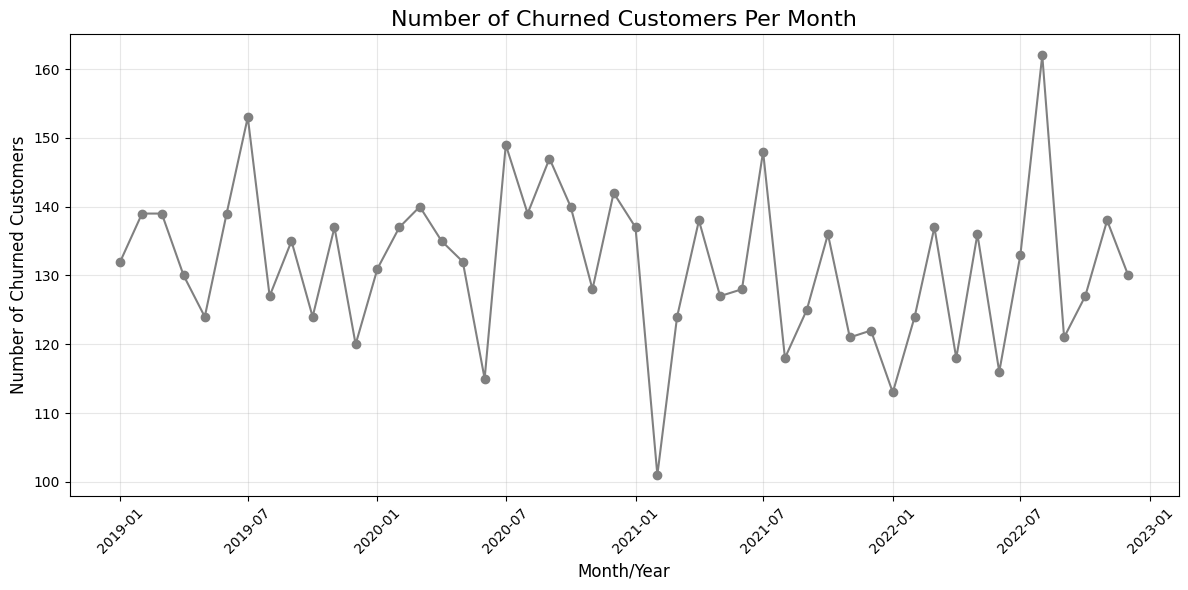

In [27]:
# Convert the period back to a datetime object for plotting
churn_counts['Timestamp'] = churn_counts['Timestamp'].dt.to_timestamp()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(churn_counts['Timestamp'], churn_counts['Count'], marker='o', linestyle='-', color='gray')

# Add labels and title
plt.title('Number of Churned Customers Per Month', fontsize=16)
plt.xlabel('Month/Year', fontsize=12)
plt.ylabel('Number of Churned Customers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()



We observed that customer churn reached its peak in July 2022, marking a significant increase in the number of customers leaving during that period. This was followed by a noticeable decline in churn starting in January 2023, as customer retention efforts seemed to have had an impact. Interestingly, the lowest churn rate was recorded in January 2021, suggesting a period of higher customer satisfaction and stability.

- How does the Net Promoter Score (NPS) correlate with churn?

In [28]:
NPS_count = Customer_df[['NPS', 'ChurnLabel']]

In [29]:
Churn_Customer = NPS_count[NPS_count['ChurnLabel'] == 1]
Churn_Customer 

,NPS,ChurnLabel
0,3,1
3,1,1
5,2,1
6,1,1
7,1,1
...,...,...
12475,3,1
12476,3,1
12477,2,1
12480,1,1


In [30]:
# Create the bins and labels for the NPS categories
bins = [0, 6, 8, 10]  # Bin ranges: 0-6 for Detractors, 7-8 for Passives, 9-10 for Promoters
labels = ['Detractor', 'Passive', 'Promoter']  # Corresponding labels for each bin

# Apply pd.cut to create a new column 'NPS_Category' based on the NPS score
Churn_Customer['NPS_Category'] = pd.cut(Churn_Customer['NPS'], bins=bins, labels=labels, right=True)


/var/folders/tk/fdypsrw94kg40x6m2x674k_m0000gn/T/ipykernel_61936/1348797579.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Churn_Customer['NPS_Category'] = pd.cut(Churn_Customer['NPS'], bins=bins, labels=labels, right=True)


In [31]:
Churn_Customer['NPS_Category'].unique()

['Detractor', NaN, 'Passive', 'Promoter']
Categories (3, object): ['Detractor' < 'Passive' < 'Promoter']

In [32]:
# Count the occurrences of each NPS category
nps_category_counts = Churn_Customer['NPS_Category'].value_counts()
nps_category_counts

NPS_Category
Detractor    4695
Passive        28
Promoter       15
Name: count, dtype: int64

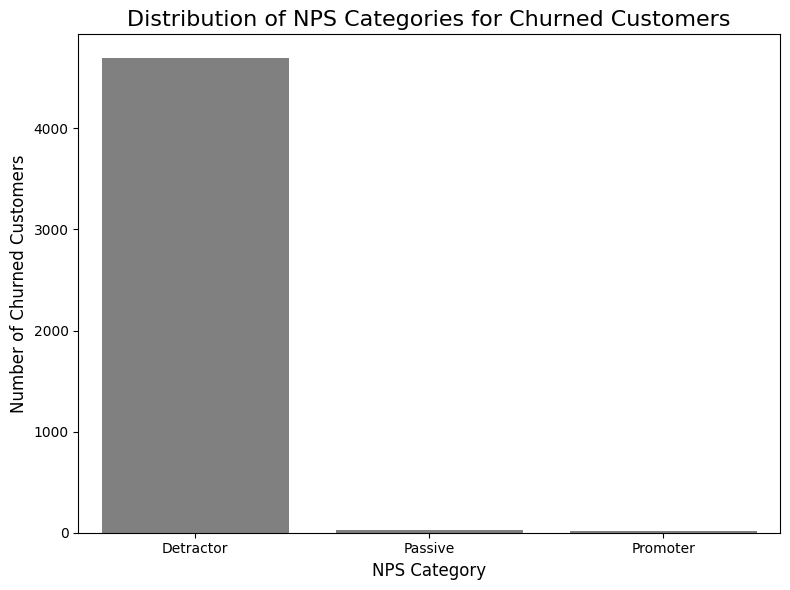

In [33]:
# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=nps_category_counts.index, y=nps_category_counts.values, color='gray')

# Customize the plot
plt.title('Distribution of NPS Categories for Churned Customers', fontsize=16)
plt.xlabel('NPS Category', fontsize=12)
plt.ylabel('Number of Churned Customers', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

We observed that Detractors (4,695), with a promotion score range of 0-6, significantly outnumber both Passives (28) and Promoters (15), indicating a considerable portion of churned customers are less likely to recommend the service.

- What is the churn probability for customers ?

In [34]:
# Calculate the churn and non-churn proportions
customer_count = Customer_df['ChurnLabel'].value_counts().reset_index()

In [35]:
labels = customer_count['ChurnLabel']  # Labels for churn and non-churn (e.g., "Churn", "Non-Churn")
sizes = customer_count['count'] 

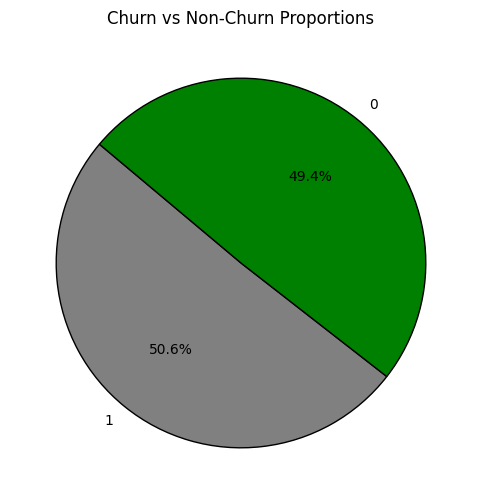

In [36]:
plt.figure(figsize=(8, 6))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%',  # Display percentages
    startangle=140,     # Start angle for better visual
    colors=['gray', 'green'],  # Add colors if desired
    wedgeprops={'edgecolor': 'black'}  # Add border for better readability
)

plt.title('Churn vs Non-Churn Proportions')
plt.show()



We discovered that churned customers constitute the majority, making up 50.6% of the total, which is slightly higher than the 49.4% represented by non-churned customers.

- How does the sentiment or frequency of customer feedback correlate with churn, 

In [37]:
Customer_df['FeedbackRating'] = Customer_df['Feedback'].apply(lambda x: eval(x)['Rating'])

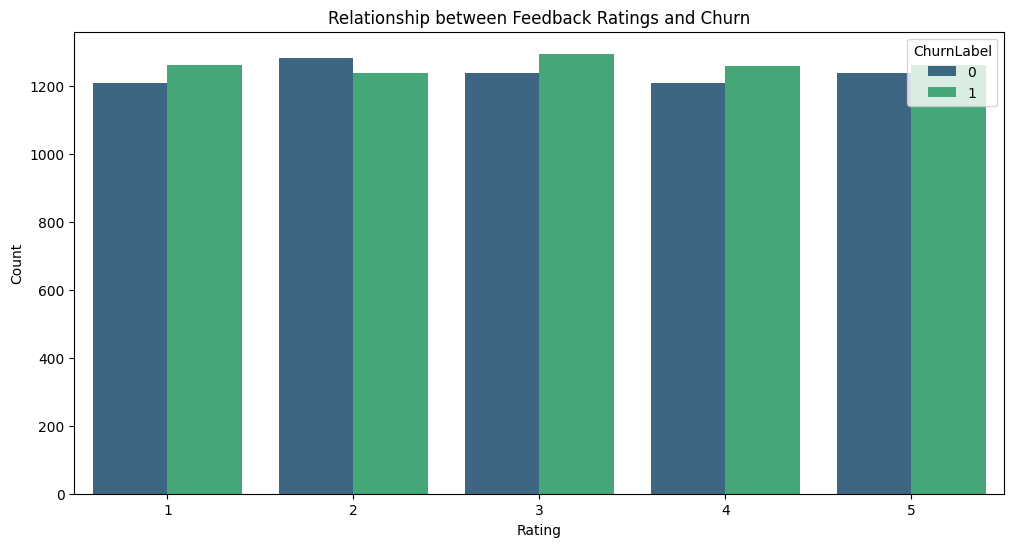

In [38]:
plt.figure(figsize = (12, 6))
sns.countplot(x= 'FeedbackRating', data=Customer_df, hue= 'ChurnLabel', palette = 'viridis')
plt.title('Relationship between Feedback Ratings and Churn')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title = 'ChurnLabel')
plt.show()

From the visual, it appears that churned customers most frequently gave a rating of 3. However, the differences in the number of customers across other ratings are minimal, suggesting that feedback ratings do not show a strong correlation with the churn label.

## MODELLING

In [39]:
Customer_df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp,FeedbackRating
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27,1
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06,2
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30,4
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03,1
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05,3


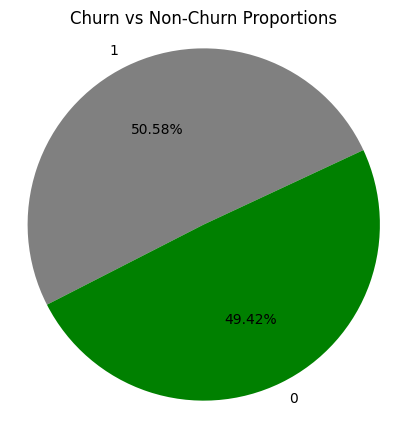

In [40]:
# Getting the counts of Sepssis

churn_counts = Customer_df['ChurnLabel'].value_counts()

explode = [0.05 if label == 'Yes' else 0 for label in churn_counts.index]

plt.figure(figsize=(5, 5))  
plt.pie(churn_counts, labels=churn_counts.index, explode=explode, autopct='%1.2f%%', startangle=25, colors=['gray', 'green'])
plt.axis('equal')
plt.title('Churn vs Non-Churn Proportions')
plt.show()


### Feature Engineering

In [41]:
for feature in nested_columns:
    Customer_df[feature] = Customer_df[feature].apply(literal_eval)

In [42]:
Customer_df

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp,FeedbackRating
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27,1
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06,2
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30,4
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03,1
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12478,13479,Catherine Lee,55,Female,New Lauren,kgarcia@example.com,(977)150-1569x426,"836 Gonzalez Drive Apt. 334\nLake Kelly, RI 01667",Segment A,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 70, 'TimeSpent(minutes)': 57}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 22, 'Frequency': 'Daily'}","{'Rating': 2, 'Comment': 'Light appear fight l...","[{'Email_Sent': '2020-11-29', 'Email_Opened': ...",8,0,2022-01-27,2
12479,13480,Kimberly Johnson,29,Male,Randymouth,carrjennifer@example.org,485.014.7824x5235,3715 Wiggins Harbors Suite 139\nEast Gregorybo...,Segment A,"[{'Product': 'Straight Pins', 'Frequency': 1, ...",...,"[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 71, 'TimeSpent(minutes)': 66}","[{'Action': 'Search', 'Page': 'category', 'Tim...","{'Logins': 25, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Yet very girl histor...","[{'Email_Sent': '2022-05-29', 'Email_Opened': ...",7,0,2020-06-14,3
12480,13481,Lisa Rodgers,38,Male,East Erin,william37@example.com,951-489-9554,"56050 Steven Summit Suite 383\nJohnmout

In [43]:
# PurchaseHistory
Customer_df['PurchaseProducts'] = Customer_df['PurchaseHistory'].apply(lambda x: '|'.join([i['Product'] for i in x]))
Customer_df['PurchaseFrequency'] = Customer_df['PurchaseHistory'].apply(lambda x: sum([i['Frequency'] for i in x]))
Customer_df['PurchaseValue'] = Customer_df['PurchaseHistory'].apply(lambda x: sum([i['Value'] for i in x]))

In [44]:

# SubscriptionDetails
Customer_df['SubscriptionPlan'] = Customer_df['SubscriptionDetails'].apply(lambda x: x['Plan'])
Customer_df['SubscriptionStartDate'] = Customer_df['SubscriptionDetails'].apply(lambda x: x['Start_Date'])
Customer_df['SubscriptionEndDate'] = Customer_df['SubscriptionDetails'].apply(lambda x: x['End_Date'])

Customer_df['SubscriptionStartDate'] = pd.to_datetime(Customer_df['SubscriptionStartDate'])
Customer_df['SubscriptionEndDate'] = pd.to_datetime(Customer_df['SubscriptionEndDate'])


Customer_df['SubscriptionDuration'] = (Customer_df['SubscriptionEndDate'] - Customer_df['SubscriptionStartDate']).dt.days


In [45]:
# Websiteusage
Customer_df['WebsitePageViews'] = Customer_df['WebsiteUsage'].apply(lambda x: x['PageViews'])
Customer_df['WebsiteTimeSpent'] = Customer_df['WebsiteUsage'].apply(lambda x: x['TimeSpent(minutes)'])


In [46]:
#EngagementMetrics
Customer_df['EngagementMetricsLogins'] = Customer_df['EngagementMetrics'].apply(lambda x: x['Logins'])
Customer_df['EngagementMetricsFrequency'] = Customer_df['EngagementMetrics'].apply(lambda x: x['Frequency'])


In [47]:

#Feedback
Customer_df['FeedbackRating'] = Customer_df['Feedback'].apply(lambda x: x['Rating'])
Customer_df['FeedbackComment'] = Customer_df['Feedback'].apply(lambda x: x['Comment'])


In [48]:

#MarketingCommunication
Customer_df['MarketingCommunicationNoOfEmails'] = Customer_df['MarketingCommunication'].apply(lambda x: len(x))
Customer_df['MarketingCommunicationOpenClickDiff'] = Customer_df['MarketingCommunication'].apply(lambda x: np.mean([
    (pd.to_datetime(i['Email_Clicked']) - pd.to_datetime(i['Email_Opened'])).days for i in x
]))
Customer_df['MarketingCommunicationSentopendiff'] = Customer_df['MarketingCommunication'].apply(lambda x: np.mean([
    (pd.to_datetime(i['Email_Opened']) - pd.to_datetime(i['Email_Sent'])).days for i in x
]))

In [49]:
# Getting all unique value ServiceInteraction 'Types'
service_interaction_types = Customer_df['ServiceInteractions'].apply(lambda x: list(set([i['Type'] for i in x])))
service_interaction_types = service_interaction_types.to_list()
unique_service_interaction_types = []
for i in service_interaction_types:
    unique_service_interaction_types.extend(i)
unique_service_interaction_types = list(set(unique_service_interaction_types))
print('All unique_service_interaction_types', unique_service_interaction_types)

All unique_service_interaction_types ['Call', 'Email', 'Chat']


In [50]:
# Getting all unique value PaymentHistory 'method'
payment_history_methods = Customer_df['PaymentHistory'].apply(lambda x: list(set([i['Method'] for i in x])))
payment_history_methods = payment_history_methods.to_list()
unique_payment_history_methods = []
for i in payment_history_methods:
    unique_payment_history_methods.extend(i)
unique_payment_history_methods = list(set(unique_payment_history_methods))
print('All unique_payment_history_methods', unique_payment_history_methods)

All unique_payment_history_methods ['Credit Card', 'PayPal', 'Bank Transfer']


In [51]:
# Getting all unique value ClickStreamData 'Action'
ClickStream_Data_Action = Customer_df['ClickstreamData'].apply(lambda x: list(set([i['Action'] for i in x])))
ClickStream_Data_Action = ClickStream_Data_Action.to_list()
unique_ClickStream_Data_Action = []
for i in ClickStream_Data_Action:
    unique_ClickStream_Data_Action.extend(i)
unique_ClickStream_Data_Action = list(set(unique_ClickStream_Data_Action))
print('All unique_ClickStream_Data_Action', unique_ClickStream_Data_Action)

All unique_ClickStream_Data_Action ['Search', 'Add to Cart', 'Click']


In [52]:
# ServiceInteractions
for usit in unique_service_interaction_types:
    Customer_df[f'ServiceInteractions_{usit}'] = Customer_df['ServiceInteractions'].apply(lambda x: len([i for i in x if i['Type']== usit]))

In [53]:
# PaymentHistory
Customer_df['PaymentHistoryNoOfLatePayments'] = Customer_df['PaymentHistory'].apply(lambda x: sum(i['Late_Payments'] for i in x))
Customer_df['PaymentHistoryAvgNoOfLatePayments'] = Customer_df['PaymentHistory'].apply(lambda x: np.mean([i['Late_Payments'] for i in x]))


In [54]:
# ClickstreamDate
for ucda in unique_ClickStream_Data_Action:
    Customer_df[f'ClickStreamData_{ucda}'] = Customer_df['ClickstreamData'].apply(lambda x: len([i for i in x if i['Action'] == ucda]))

In [55]:
Customer_df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentopendiff,ServiceInteractions_Call,ServiceInteractions_Email,ServiceInteractions_Chat,PaymentHistoryNoOfLatePayments,PaymentHistoryAvgNoOfLatePayments,ClickStreamData_Search,ClickStreamData_Add to Cart,ClickStreamData_Click
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,319.0,818.0,1,1,2,40,13.333333,12,8,4
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,88.0,110.0,5,10,4,10,3.333333,7,8,9
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,117.0,333.0,1,1,1,8,2.666667,7,2,3
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,423.0,159.0,17,18,24,79,26.333333,16,15,16
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,96.0,193.0,4,5,1,2,0.666667,4,17,9


In [56]:
Customer_df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp',
       'FeedbackRating', 'PurchaseProducts', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'SubscriptionStartDate',
       'SubscriptionEndDate', 'SubscriptionDuration', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedbackComment',
       'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentopendiff', 'ServiceInteractions_Call',
       'ServiceInteractions_Email', 'ServiceInteractions_Chat',
       'PaymentHistoryNoOfLatePayments', 'PaymentHistoryAvgNoOfLatePayments',
       'ClickStreamData_Search', 'ClickS

In [57]:
df_ = Customer_df[['Age', 'Gender',
       'NPS', 'ChurnLabel',
       'FeedbackRating', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'SubscriptionDuration',
       'EngagementMetricsLogins', 'EngagementMetricsFrequency',
       'MarketingCommunicationNoOfEmails',  'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentopendiff', 'WebsitePageViews', 'WebsiteTimeSpent', 'ServiceInteractions_Email',
       'ServiceInteractions_Chat', 'ServiceInteractions_Call',
       'PaymentHistoryNoOfLatePayments',
       'ClickStreamData_Add to Cart', 'ClickStreamData_Search',
       'ClickStreamData_Click']]

In [58]:
df_.head()

,Age,Gender,NPS,ChurnLabel,FeedbackRating,PurchaseFrequency,PurchaseValue,SubscriptionPlan,SubscriptionDuration,EngagementMetricsLogins,...,MarketingCommunicationSentopendiff,WebsitePageViews,WebsiteTimeSpent,ServiceInteractions_Email,ServiceInteractions_Chat,ServiceInteractions_Call,PaymentHistoryNoOfLatePayments,ClickStreamData_Add to Cart,ClickStreamData_Search,ClickStreamData_Click
0,31,Male,3,1,1,38,3994.72,Express,871,19,...,818.0,49,15,1,2,1,40,8,12,4
1,66,Female,6,0,2,4,2844.35,Pro,290,9,...,110.0,100,9,10,4,5,10,8,7,9
2,36,Female,3,0,4,14,1866.52,Essential,319,19,...,333.0,1,97,1,1,1,8,2,7,3
3,62,Female,1,1,1,28,1378.64,Smart,803,4,...,159.0,25,31,18,24,17,79,15,16,16
4,68,Female,3,0,3,39,2425.05,Basic,580,12,...,193.0,77,51,5,1,4,2,17,4,9


In [59]:
df_.loc[0]

Age                                         31
Gender                                    Male
NPS                                          3
ChurnLabel                                   1
FeedbackRating                               1
PurchaseFrequency                           38
PurchaseValue                          3994.72
SubscriptionPlan                       Express
SubscriptionDuration                       871
EngagementMetricsLogins                     19
EngagementMetricsFrequency              Weekly
MarketingCommunicationNoOfEmails             8
MarketingCommunicationOpenClickDiff      319.0
MarketingCommunicationSentopendiff       818.0
WebsitePageViews                            49
WebsiteTimeSpent                            15
ServiceInteractions_Email                    1
ServiceInteractions_Chat                     2
ServiceInteractions_Call                     1
PaymentHistoryNoOfLatePayments              40
ClickStreamData_Add to Cart                  8
ClickStreamDa

In [60]:
print('Total dataset length:', len(df_))
df_[['Gender', 'SubscriptionPlan', 'EngagementMetricsFrequency']].nunique()


Total dataset length: 12483


Gender                         2
SubscriptionPlan              20
EngagementMetricsFrequency     3
dtype: int64

In [61]:
# Gender encoding
gender_map = {'Male': 0,'Female': 1}

# Subscription encoding
unique_subscription_plans = df_['SubscriptionPlan'].unique()
subscription_plan_map = {unique_subscription_plans[i]: i for i in range(len(unique_subscription_plans))} 

#EngagementMetricFrequency
unique_engagement_frequency = df_['EngagementMetricsFrequency'].unique()
engagement_frequency_map = {unique_engagement_frequency[i]: i for i in range(len(unique_engagement_frequency))} 

# Encode
df_.loc[:, 'Gender']= df_.loc[:, 'Gender'].map(gender_map)
df_.loc[:, 'SubscriptionPlan']= df_.loc[:, 'SubscriptionPlan'].map(subscription_plan_map)
df_.loc[:, 'EngagementMetricsFrequency']= df_.loc[:, 'EngagementMetricsFrequency'].map(engagement_frequency_map)


In [62]:
df_.loc[0]

Age                                         31
Gender                                       0
NPS                                          3
ChurnLabel                                   1
FeedbackRating                               1
PurchaseFrequency                           38
PurchaseValue                          3994.72
SubscriptionPlan                             0
SubscriptionDuration                       871
EngagementMetricsLogins                     19
EngagementMetricsFrequency                   0
MarketingCommunicationNoOfEmails             8
MarketingCommunicationOpenClickDiff      319.0
MarketingCommunicationSentopendiff       818.0
WebsitePageViews                            49
WebsiteTimeSpent                            15
ServiceInteractions_Email                    1
ServiceInteractions_Chat                     2
ServiceInteractions_Call                     1
PaymentHistoryNoOfLatePayments              40
ClickStreamData_Add to Cart                  8
ClickStreamDa

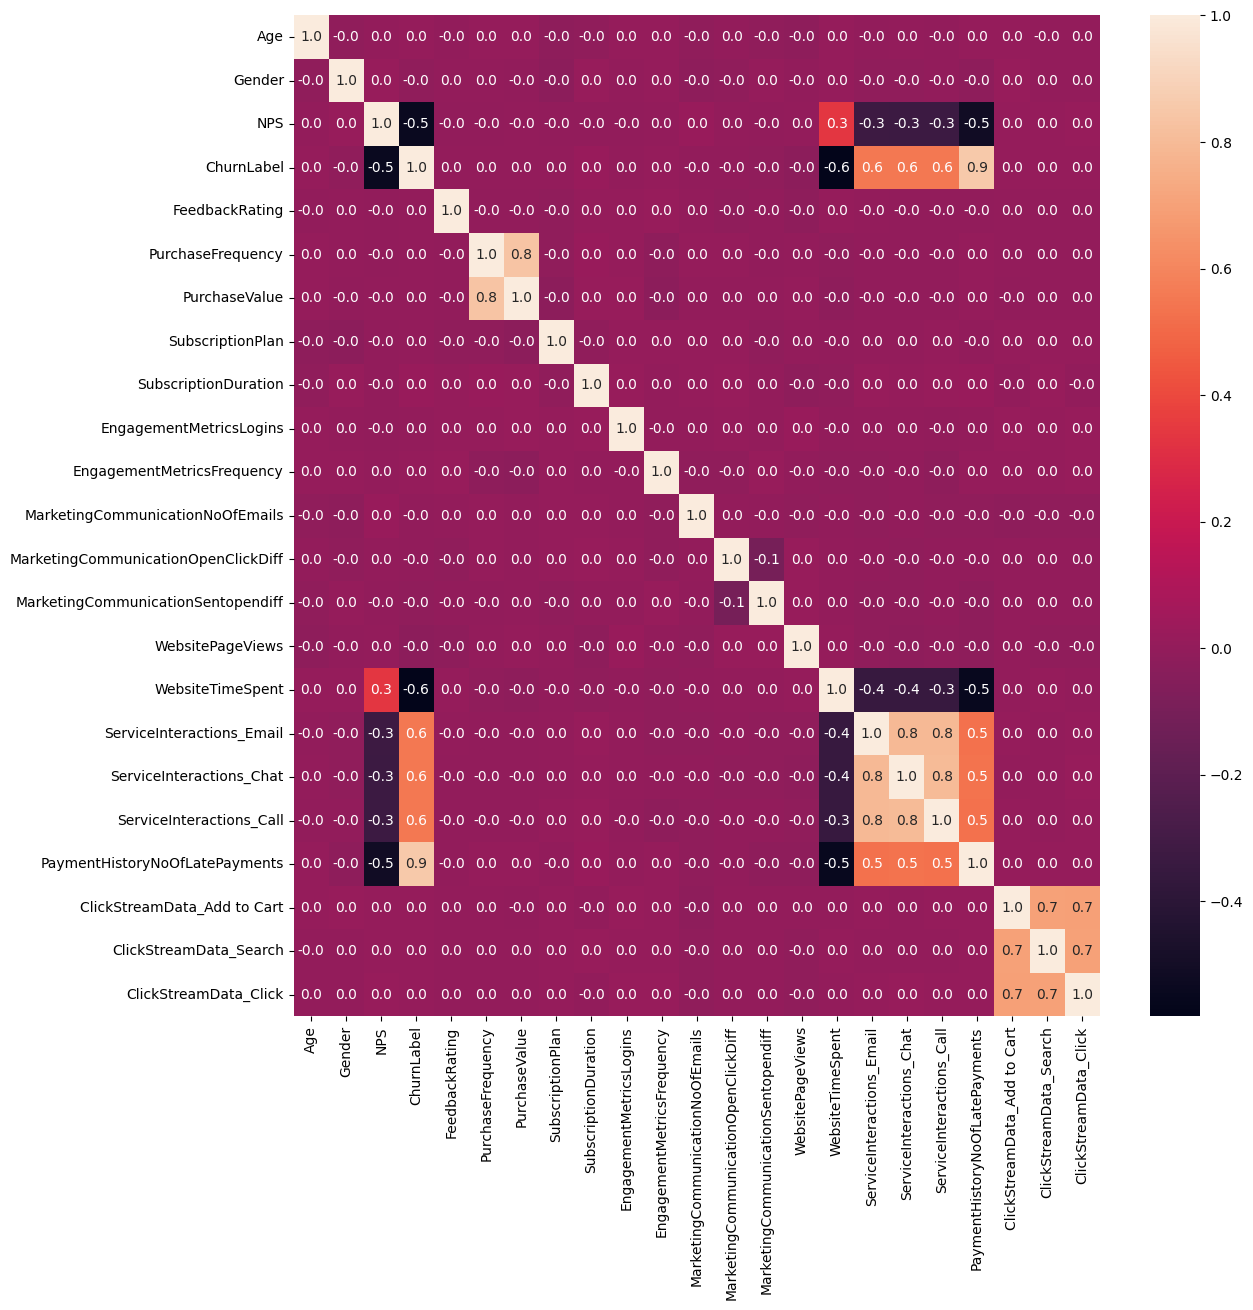

In [63]:
df_corr = df_.corr()
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(df_corr, annot = True, fmt= '.1f', ax=ax)
plt.show()

#### SPLIT DATA INTO TRAIN, TEST SET

In [64]:
X = df_.drop(columns = ['ChurnLabel'])

y = df_['ChurnLabel']

In [65]:
X_train, X_other, y_train, y_other = train_test_split(X, y, train_size = 0.8, random_state=42)
X_test, X_eval, y_test, y_eval = train_test_split(X, y, test_size = 0.3,  random_state=42)

In [66]:
# Check dataset sizes
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_eval.shape}, {y_eval.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Training set: (9986, 22), (9986,)
Validation set: (3745, 22), (3745,)
Test set: (8738, 22), (8738,)


In [67]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)
X_eval = ss.fit_transform(X_eval)

#### Train and evaluate on labels

In [68]:
def evaluate(X, y, model, dataset_name="Dataset"):
    """Evaluate the model and print classification metrics"""
    y_pred = model.predict(X)
    print(f"\n📊 Evaluation on {dataset_name}:")
    print(classification_report(y, y_pred))
    print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")
    print(f"Precision: {precision_score(y, y_pred):.4f}")
    print(f"Recall: {recall_score(y, y_pred):.4f}")
    print(f"f1 score: {f1_score(y, y_pred):.4f}")

#### LOGISTIC REGRESSION

In [69]:
lr = LogisticRegression(random_state=5)
lr.fit(X_train, y_train)

evaluate (X_train, y_train, lr, 'Train')
evaluate (X_eval, y_eval, lr, 'Validation')


📊 Evaluation on Train:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4907
           1       0.98      0.97      0.97      5079

    accuracy                           0.97      9986
   macro avg       0.97      0.97      0.97      9986
weighted avg       0.97      0.97      0.97      9986

Accuracy: 0.9710
Precision: 0.9767
Recall: 0.9659
f1 score: 0.9713

📊 Evaluation on Validation:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1869
           1       0.97      0.96      0.97      1876

    accuracy                           0.97      3745
   macro avg       0.97      0.97      0.97      3745
weighted avg       0.97      0.97      0.97      3745

Accuracy: 0.9669
Precision: 0.9700
Recall: 0.9638
f1 score: 0.9668


#### DECISION TREE

In [70]:
Dt = DecisionTreeClassifier(random_state=5, max_depth=5)
Dt.fit(X_train, y_train)

evaluate (X_train, y_train, Dt, 'Train')
evaluate (X_eval, y_eval, Dt, 'Validation')


📊 Evaluation on Train:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4907
           1       0.98      0.98      0.98      5079

    accuracy                           0.98      9986
   macro avg       0.98      0.98      0.98      9986
weighted avg       0.98      0.98      0.98      9986

Accuracy: 0.9769
Precision: 0.9775
Recall: 0.9770
f1 score: 0.9773

📊 Evaluation on Validation:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1869
           1       0.97      0.97      0.97      1876

    accuracy                           0.97      3745
   macro avg       0.97      0.97      0.97      3745
weighted avg       0.97      0.97      0.97      3745

Accuracy: 0.9717
Precision: 0.9712
Recall: 0.9723
f1 score: 0.9718


#### RANDOM FOREST

In [71]:
RF = RandomForestClassifier(random_state=5, max_depth=10)
RF.fit(X_train, y_train)

evaluate (X_train, y_train, RF, 'Train')
evaluate (X_eval, y_eval, RF, 'Validation')


📊 Evaluation on Train:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4907
           1       0.98      0.98      0.98      5079

    accuracy                           0.98      9986
   macro avg       0.98      0.98      0.98      9986
weighted avg       0.98      0.98      0.98      9986

Accuracy: 0.9770
Precision: 0.9775
Recall: 0.9772
f1 score: 0.9774

📊 Evaluation on Validation:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1869
           1       0.97      0.97      0.97      1876

    accuracy                           0.97      3745
   macro avg       0.97      0.97      0.97      3745
weighted avg       0.97      0.97      0.97      3745

Accuracy: 0.9714
Precision: 0.9702
Recall: 0.9728
f1 score: 0.9715


#### GRADIENT BOOST

In [72]:
GB =GradientBoostingClassifier(random_state=5,max_depth=2)
GB.fit(X_train, y_train)

evaluate (X_train, y_train, GB, 'Train')
evaluate (X_eval, y_eval, GB, 'Validation')


📊 Evaluation on Train:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4907
           1       0.98      0.98      0.98      5079

    accuracy                           0.98      9986
   macro avg       0.98      0.98      0.98      9986
weighted avg       0.98      0.98      0.98      9986

Accuracy: 0.9765
Precision: 0.9775
Recall: 0.9762
f1 score: 0.9768

📊 Evaluation on Validation:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1869
           1       0.97      0.97      0.97      1876

    accuracy                           0.97      3745
   macro avg       0.97      0.97      0.97      3745
weighted avg       0.97      0.97      0.97      3745

Accuracy: 0.9701
Precision: 0.9701
Recall: 0.9701
f1 score: 0.9701


#### EVALUATE THE TEST SET

In [74]:
evaluate(X_test, y_test, lr, 'LogisticRegression Test')
evaluate(X_test, y_test, Dt, 'Decision Tree Test')
evaluate(X_test, y_test, RF, 'Random Forest Test')
evaluate(X_test, y_test, GB, 'Gradient boosting Test')


📊 Evaluation on LogisticRegression Test:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4300
           1       0.98      0.97      0.97      4438

    accuracy                           0.97      8738
   macro avg       0.97      0.97      0.97      8738
weighted avg       0.97      0.97      0.97      8738

Accuracy: 0.9722
Precision: 0.9779
Recall: 0.9671
f1 score: 0.9725

📊 Evaluation on Decision Tree Test:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4300
           1       0.98      0.98      0.98      4438

    accuracy                           0.98      8738
   macro avg       0.98      0.98      0.98      8738
weighted avg       0.98      0.98      0.98      8738

Accuracy: 0.9776
Precision: 0.9783
Recall: 0.9775
f1 score: 0.9779

📊 Evaluation on Random Forest Test:
              precision    recall  f1-score   support

           0       0.98      0.98      0.

#### CONFUSION MATRIX

Text(0.5, 1.0, 'Confusion Matrix on Test set for Logistic Regression')

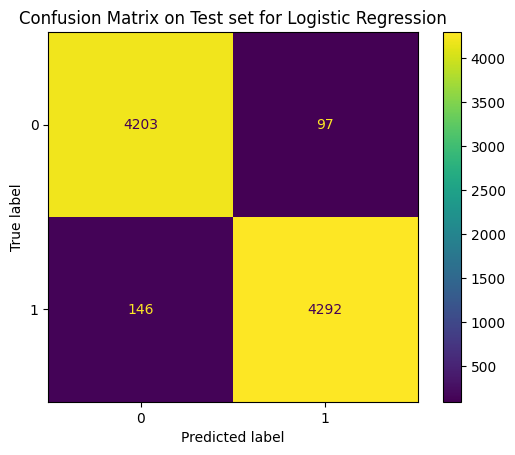

In [79]:
lr_y_pred = lr.predict(X_test)
logistic_regression_confusion_matrix = confusion_matrix(y_test, lr_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix = logistic_regression_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test set for Logistic Regression')

Text(0.5, 1.0, 'Confusion Matrix on Test set for Decision tree')

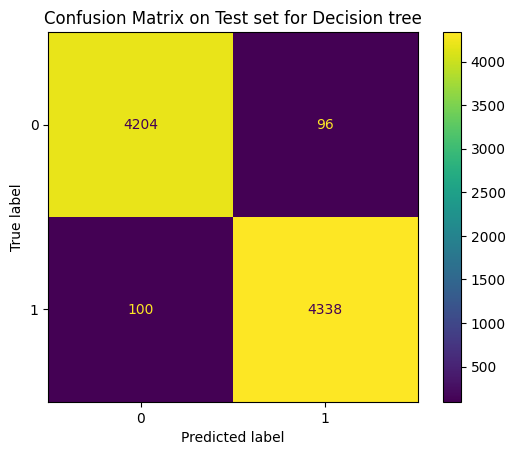

In [80]:
Dt_y_pred = Dt.predict(X_test)
Decision_tree_confusion_matrix = confusion_matrix(y_test, Dt_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix = Decision_tree_confusion_matrix )
display.plot()
plt.title('Confusion Matrix on Test set for Decision tree')

Text(0.5, 1.0, 'Confusion Matrix on Test set for Random Forest')

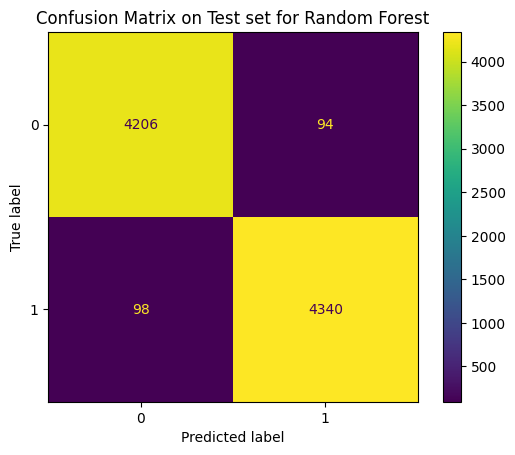

In [82]:
Rf_y_pred = RF.predict(X_test)
Random_Forest_confusion_matrix = confusion_matrix(y_test, Rf_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix = Random_Forest_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test set for Random Forest')

Text(0.5, 1.0, 'Confusion Matrix on Test set for gradient boost')

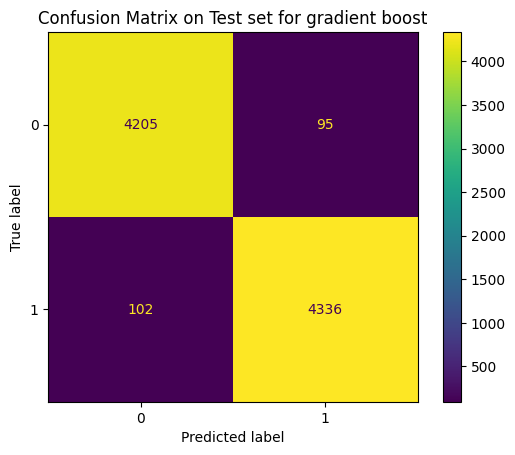

In [83]:
Gb_y_pred = GB.predict(X_test)
Gradient_boost_confusion_matrix = confusion_matrix(y_test, Gb_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix = Gradient_boost_confusion_matrix )
display.plot()
plt.title('Confusion Matrix on Test set for gradient boost')

## CONCLUSION

Our analysis revealed that we picked Decision Tree model has our model due tpo the fact that it has a very high accuracy store after tuning the parameters, also the most significant factors influencing customer churn are the level of customer engagement and payment behavior. Specifically, the number of service interactions—whether through calls, emails, or chats—plays a crucial role in understanding customer needs and satisfaction. Additionally, the frequency of late payments serves as a strong indicator of potential churn, as customers who consistently delay payments may be at a higher risk of discontinuing their service. Lastly, the amount of time a customer spends on the company website provides valuable insights into their level of interest and engagement with the brand. By focusing on these key features, we can develop more effective strategies to improve customer retention and enhance overall satisfaction.